# Energy consumption of single household with yearly seasonality

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

In [107]:
full_data = pd.read_csv("../../data/synthetic/time_series_single_household.csv")
print(len(full_data))

1442


In [108]:
full_data.head(10)

,Index,Time,Energy
0,0,16/12/2006,2.487728
1,1,17/12/2006,1.619929
2,2,18/12/2006,1.313087
3,3,19/12/2006,1.207975
4,4,20/12/2006,1.581628
5,5,21/12/2006,1.169972
6,6,22/12/2006,2.996203
7,7,23/12/2006,2.798056
8,8,24/12/2006,1.318883
9,9,25/12/2006,2.811164


In [109]:
data = full_data.drop(columns=['Index']).copy()

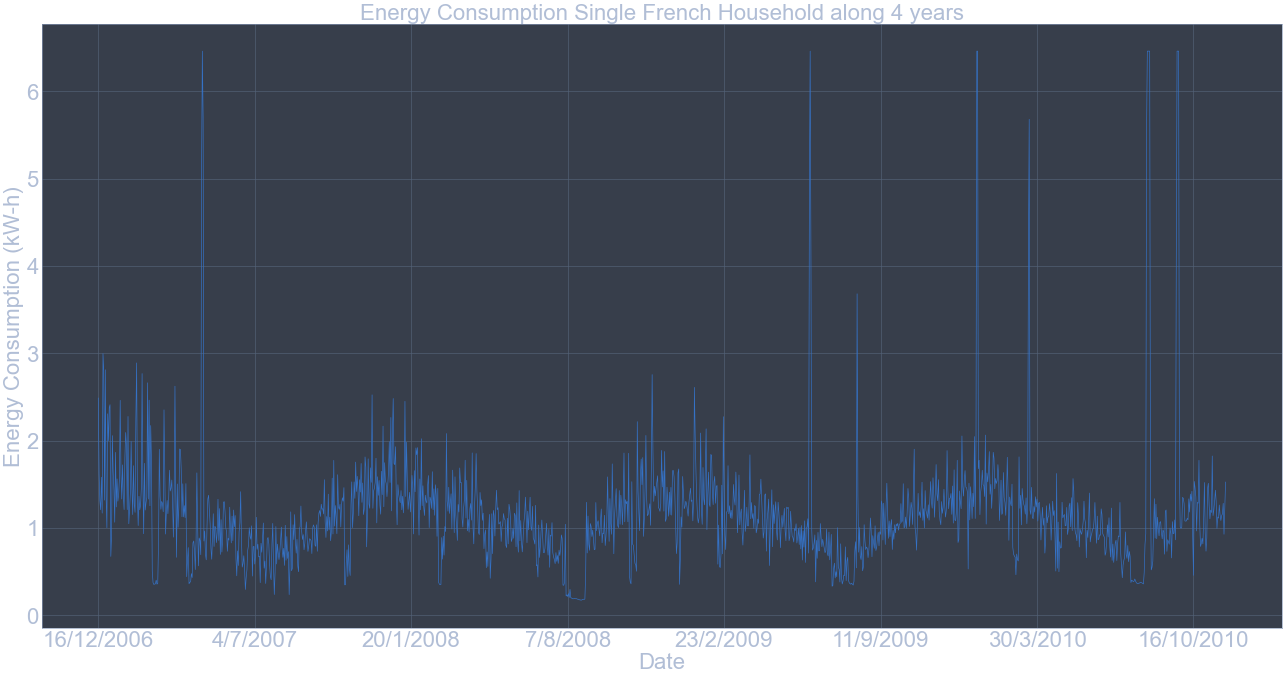

In [110]:
plt.figure(figsize=(40,20), dpi=40)
plt.locator_params(axis='x', nbins=3)
x_ticks = np.arange(0, len(data["Time"]), 200)
plt.xticks(x_ticks)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.plot(data["Time"], data["Energy"])
plt.xlabel("Date", fontsize=40)
plt.ylabel("Energy Consumption (kW-h)", fontsize=40)
plt.title("Energy Consumption Single French Household along 4 years", fontsize=40)
plt.show()

In [111]:
# We observed from the above plot that the trend, seasonality and periodicity can be identified. The irregularity are mostly given by the outliers.

# Rolling Statistics


In [112]:
rollmean = data["Energy"].rolling(window=365).mean()
rollstd = data["Energy"].rolling(window=365).std()
#print(rollmean, rollstd)

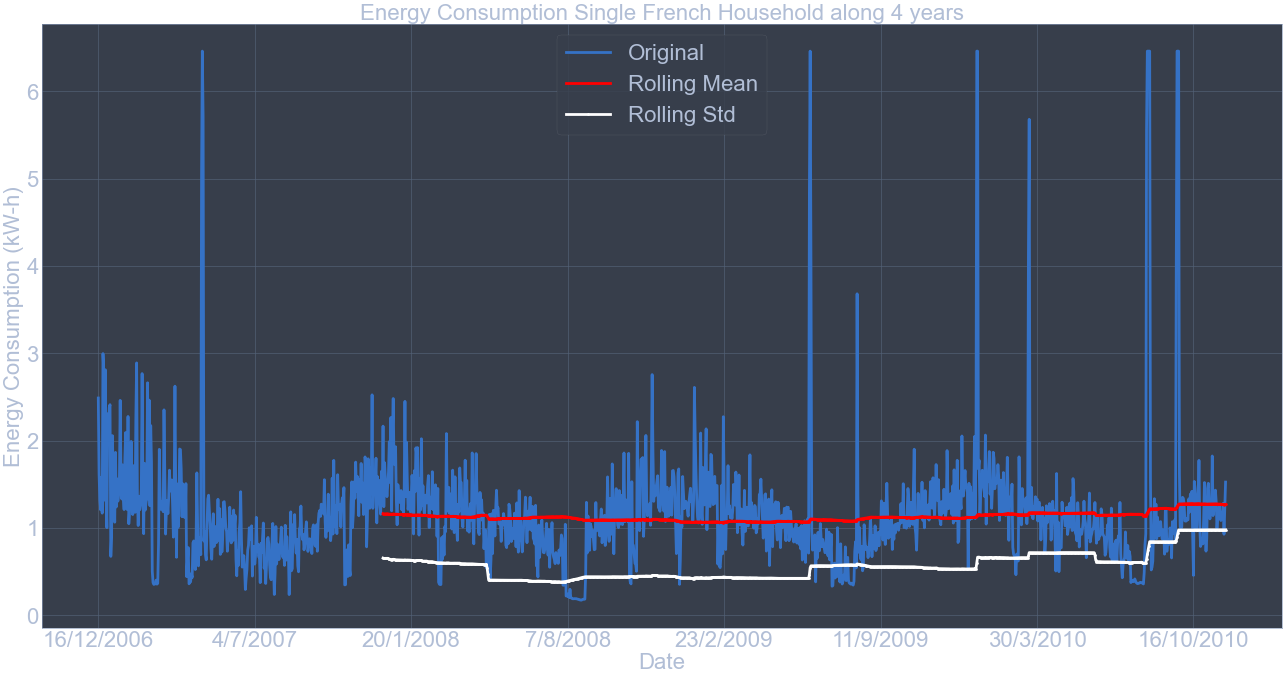

In [113]:
plt.figure(figsize=(40,20), dpi=40)
plt.locator_params(axis='x', nbins=3)
x_ticks = np.arange(0, len(full_data["Time"]), 200)
plt.xticks(x_ticks)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.plot(data["Time"], data["Energy"], label='Original', linewidth='5')
mean = plt.plot(data["Time"], rollmean, '-p', color='red', label='Rolling Mean', linewidth='5')
std = plt.plot(data["Time"], rollstd, '-p', color='white', label='Rolling Std', linewidth='5')
plt.xlabel("Date", fontsize=40)
plt.ylabel("Energy Consumption (kW-h)", fontsize=40)
plt.title("Energy Consumption Single French Household along 4 years", fontsize=40)
plt.legend(loc='best', fontsize=40)
plt.show()


In [114]:
# Also we notice that the data show a stationary behaviour (there is not overall increase or decrease)
# The mean and standard deviation show that there is no significant trend across the yearly seasons

## Outliers treatment

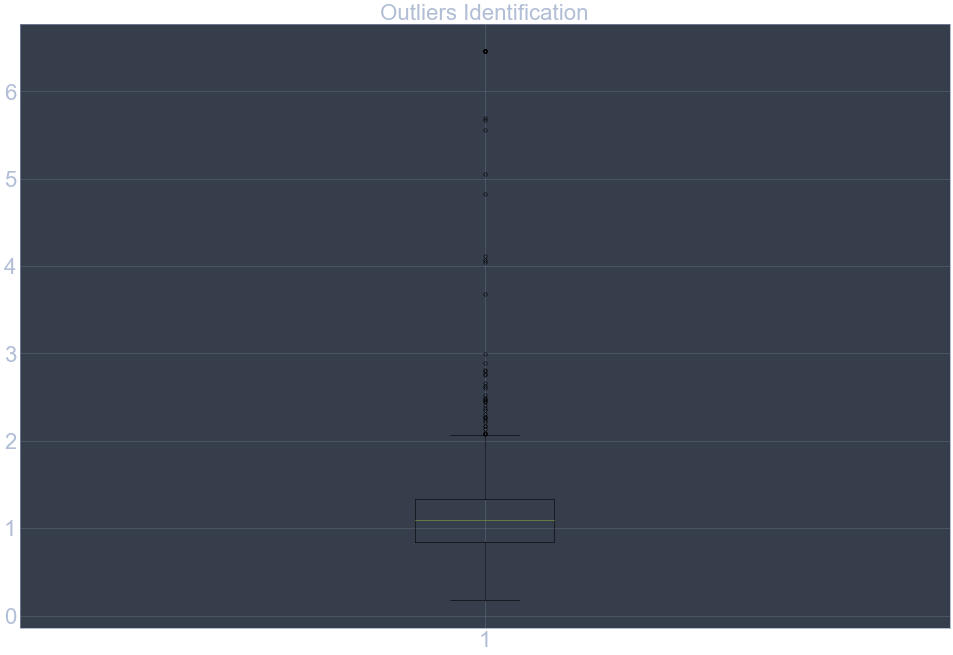

1.1590149882732022


In [115]:
# Find better colors to visualize the boxplot
#plt.title("Outliers Identification", fontsize=40)
plt.figure(figsize=(30,20), dpi=40)
plt.boxplot(data['Energy'])
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title("Outliers Identification", fontsize=40)
plt.show()
print(data["Energy"].mean())

In [116]:
# we have potentially 8 outliers, but clearly at least seven should be consider as outlier
max_value = 4.0
# The following condition returns a boolean array and the sum() call adds only the true conditions
outliers_number = (data["Energy"] > max_value).sum()
outliers_density = outliers_number/len(data["Energy"])
print(f"The number of outliers is {outliers_number} and the outliers density is: {outliers_density}")


The number of outliers is 19 and the outliers density is: 0.013176144244105409


In [117]:
# Outliers removal
# data.loc[data["Energy"] > 4] = data["Energy"].mean()
# plt.figure(figsize=(30,20), dpi=40)
# plt.boxplot(data['Energy'])
# plt.xticks(fontsize=40)
# plt.yticks(fontsize=40)
# plt.title("Outliers Removal", fontsize=40)
# plt.show()
# print(data["Energy"].mean())

## Normalization

In [118]:
# We will use Standard Scaling because the data is not evenly distributed
scaler = StandardScaler()
# to convert a column from dataframe to a numpy array
energy_values = data.iloc[:,1].values
X = scaler.fit_transform(energy_values.reshape(-1,1))
print(X)

[[ 1.92476276]
 [ 0.66767661]
 [ 0.22318821]
 ...
 [-0.33383566]
 [ 0.13100545]
 [ 0.53081782]]


## Gaussian revision

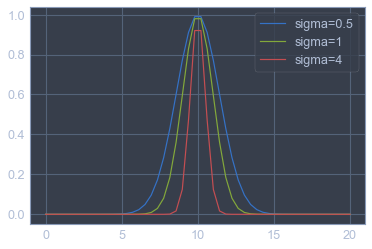

In [119]:
# Here the different values of sigma will play a role of one hyperparameter
gaussianx = np.linspace(0,20)
mu1, sigma1 = 10, 0.5
gaussiany1 = np.exp(-(gaussianx - mu1) ** 2 / 2 * sigma1)
mu2, sigma2 = 10, 1
gaussiany2 = np.exp(-(gaussianx - mu2) ** 2 / 2 * sigma2)
mu3, sigma3 = 10, 4
gaussiany3 = np.exp(-(gaussianx - mu3) ** 2 / 2 * sigma3)
plt.plot(gaussianx, gaussiany1, label="sigma=0.5")
plt.plot(gaussianx, gaussiany2, label="sigma=1")
plt.plot(gaussianx, gaussiany3, label="sigma=4")
plt.legend(loc="best")

In [120]:
# Assumption: every point has the same "gaussian influence" across a single month
# Here we define a monthly importance(decay) factor and the sigma hyperparameter
sigma = 1
nm = 12
m = np.zeros(shape=(1,nm))
for i in range(nm):
    m[0,i] = i * 2
    
#XE : XEngineered
XE = np.zeros(shape=(len(X),nm))
Identity = np.ones(shape=(1,nm))
print(len(XE))
for i in range(len(X)):
    XE[i,:] = np.exp(-(X[i] * Identity - m) * (X[i] * Identity - m) / (2 * sigma))
print(XE)

1442
[[1.56867176e-001 9.97173681e-001 1.16099836e-001 ... 7.69618040e-057
  1.13478247e-071 3.06458782e-088]
 [8.00198045e-001 4.11666052e-001 3.87895458e-003 ... 5.84682648e-066
  6.97696308e-082 1.52487666e-099]
 [9.75401118e-001 2.06278091e-001 7.98996784e-004 ... 2.38894719e-069
  1.17185818e-085 1.05284790e-103]
 ...
 [9.45800969e-001 6.56515250e-002 8.34664524e-005 ... 1.02423577e-073
  1.64908732e-090 4.86305791e-109]
 [9.91455500e-001 1.74370957e-001 5.61690587e-004 ... 4.62036352e-070
  1.88484534e-086 1.40830710e-104]
 [8.68590256e-001 3.39850948e-001 2.43547732e-003 ... 5.40345264e-067
  4.90392176e-083 8.15150480e-101]]


# Machine Learning using Linear Regression


## Spliting the data

In [121]:
# for time series we should never split the data randomly! All the test data are the last points to consider
# We have 1442 days, two years will be for training, one year for validation and the rest for test 

In [122]:
Xtrain = XE[0:365]
Xval = XE[365:730]
Xtest = XE[1095:]
ytrain = X[0:365]
yval = X[365:730]
ytest = X[1095:]
print("Size of traininig set:" , len(Xtrain),";\tSize of validations set:", len(Xval), ";\tSize of test set: ", len(Xtest))

Size of traininig set: 365 ;	Size of validations set: 365 ;	Size of test set:  347


In [123]:
# From the above we observe that some coefficients have too large values, then we probably will need some regularization techniques

## Regularization using Ridge Regression

In [124]:
# Linear Regression
lr = LinearRegression().fit(Xtrain, yval)
# Ridge Regression
alpha = 1
lrr = Ridge(alpha).fit(Xtrain, yval)

In [125]:
print("Results from Linear Regression")
print("slope parameters / weight coefficients (lr.coef_):")
print(lr.coef_)
print("intercept parameter / constant term (lr.intercept_):")
print(lr.intercept_)

Results from Linear Regression
slope parameters / weight coefficients (lr.coef_):
[[ 8.55945256e-01  1.92145440e+00 -3.67517256e+00  5.48362973e+02
  -9.70755622e+03  1.18564155e+06 -8.09187350e+08 -2.17166766e+04
  -9.58191621e-03 -7.65543180e-11 -1.11881611e-20 -2.99439109e-32]]
intercept parameter / constant term (lr.intercept_):
[-1.15035704]


In [126]:
print("Results from Ridge Regression")
print("slope parameters / weight coefficients (lrr.coef_):")
print(lrr.coef_)
print("intercept parameter / constant term (lrr.intercept_):")
print(lrr.intercept_)

Results from Ridge Regression
slope parameters / weight coefficients (lrr.coef_):
[[ 7.43966930e-01  1.60233056e+00  1.46688178e-01  3.39367558e-01
   1.05287686e-01 -1.58590189e-03 -3.35865196e-06 -8.33147646e-11
  -3.64577047e-17 -2.91010431e-25 -4.25258742e-35 -1.13814638e-46]]
intercept parameter / constant term (lrr.intercept_):
[-1.0108575]


In [127]:
print("Scores for Linear Regression")
print("Training set score: {:.2f}".format(lr.score(Xtrain, ytrain)))
print("Test set score: {:.2f}".format(lr.score(Xval, yval)))

print("Scores for Ridge Regression")
print("Training set score: {:.2f}".format(lrr.score(Xtrain, ytrain)))
print("Test set score: {:.2f}".format(lrr.score(Xval, yval)))

Scores for Linear Regression
Training set score: 0.33
Test set score: 0.77
Scores for Ridge Regression
Training set score: 0.29
Test set score: 0.71


# Results Visualization 

In [128]:
y_valpredict = lrr.predict(Xval)

In [129]:
# print(y_valpredict[0:5])
# print(yval[0:5])
size = len(Xtrain) + len(Xval)
xreal_values = data.iloc[0:size,0].values
yreal = np.concatenate((ytrain, yval))
print(len(data["Time"][0:size]), len(yreal))
# print(np.transpose(yreal), type(np.transpose(yreal)))
# print(np.transpose(xreal_values), type(np.transpose(xreal_values)))

730 730
[[ 1.92476276e+00  6.67676607e-01  2.23188213e-01  7.09230829e-02
   6.12194420e-01  1.58725618e-02  2.66133559e+00  2.37430111e+00
   2.31584011e-01  2.39328973e+00  2.85290561e-01 -2.25257654e-01
   1.66332007e+00  1.21782258e+00  1.76451428e+00  1.81428348e+00
  -7.01178483e-01 -3.59346978e-01  1.30113987e+00  7.00955997e-01
   4.02867947e-01 -1.34503363e-01  1.02337637e+00  1.18511343e-01
   5.83903725e-01  2.13561112e-01  3.19879719e-01  5.79966371e-01
   1.88602701e+00  6.67003059e-01  2.50077703e-01  8.16026514e-01
   2.90740888e-01  7.46069329e-02  9.26793507e-01  1.35246228e+00
   1.12982776e+00  7.47678876e-02  1.61878190e+00 -1.59940237e-01
   7.12530400e-02  3.52573637e-01  1.20527370e+00  4.22017529e-01
  -7.66303487e-03  8.02854387e-01  1.61357476e-01  2.90929760e-02
   1.56764257e+00  2.50684527e+00  2.92728678e-01 -1.89680636e-01
   2.95744566e-01  7.07339612e-02  1.45867601e-01  4.16923314e-01
   2.32982531e+00  5.34784383e-01 -3.24898654e-01  8.41616295e-01
  

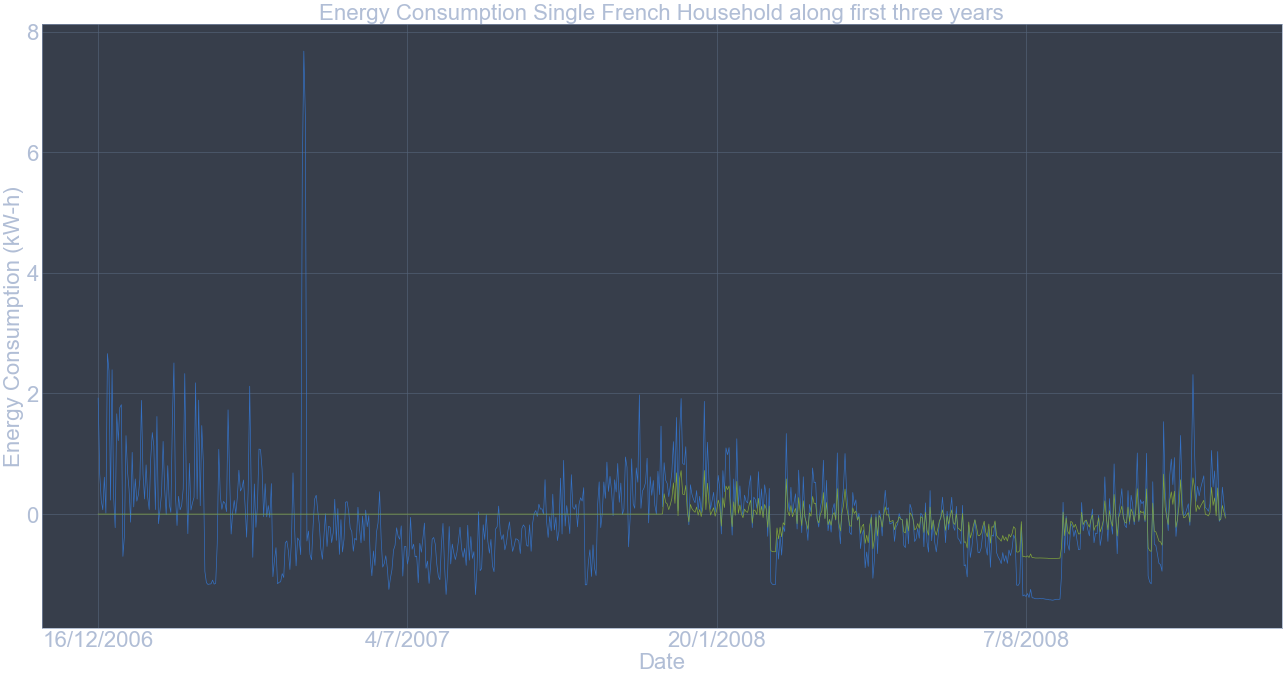

In [130]:
plt.figure(figsize=(40,20), dpi=40)
plt.locator_params(axis='x', nbins=3)
x_ticks = np.arange(0, len(Xtrain) + len(Xval), 200)
plt.xticks(x_ticks)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
size = len(Xtrain) + len(Xval)
yreal = np.concatenate((ytrain, yval))
xreal_values = data.iloc[0:size,0].values
plt.plot(xreal_values, yreal)
ypred= lrr.predict(Xval)
ynull = np.zeros(len(ytrain))
ypredicted = np.concatenate((ynull.reshape(-1,1), ypred))
plt.plot(xreal_values, ypredicted)
plt.xlabel("Date", fontsize=40)
plt.ylabel("Energy Consumption (kW-h)", fontsize=40)
plt.title("Energy Consumption Single French Household along first three years", fontsize=40)
plt.show()

# Conclusion
- So far we have that using Linear Regression method without regularization we are not able to predict accurately
- Using Linear Regression with Ridge regularization and alpha = 1, we get an accuracy of 83%
- Further test to explore the optimal conditions for sigma and lambda or the number of radial function basis need to be implemented